In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
df = pd.read_csv("data.csv")

In [ ]:
print(df.head)

<bound method NDFrame.head of             Date    Pizza     Meat   Cheese   Tomato    Wheat
0     1939-03-01      NaN     13.6      NaN      NaN      NaN
1     1939-04-01      NaN        .      NaN      NaN      NaN
2     1939-05-01      NaN        .      NaN      NaN      NaN
3     1939-06-01      NaN     13.0      NaN      NaN      NaN
4     1939-07-01      NaN        .      NaN      NaN      NaN
...          ...      ...      ...      ...      ...      ...
1016  2023-11-01  185.866  236.693  173.983  227.514  256.881
1017  2023-12-01  186.095  244.406  171.137  226.849  260.842
1018  2024-01-01  185.975  236.073  167.868  226.149  258.171
1019  2024-02-01  185.641  237.718  169.679  230.496  256.744
1020  2024-03-01  186.257  243.343  168.963  223.064  250.295

[1021 rows x 6 columns]>


In [ ]:
#remove everything before the first date they all share
df = df.iloc[585:]

In [ ]:
print(df.head)

<bound method NDFrame.head of             Date    Pizza     Meat   Cheese   Tomato    Wheat
585   1987-12-01  123.800     93.7   94.400  100.000     90.0
586   1988-01-01  124.200     98.4   94.000   99.500     91.2
587   1988-02-01  123.000     97.9   92.800   99.500     94.4
588   1988-03-01  121.200     98.7   92.400   99.700     90.6
589   1988-04-01  125.000     99.0   92.300   99.000     93.5
...          ...      ...      ...      ...      ...      ...
1016  2023-11-01  185.866  236.693  173.983  227.514  256.881
1017  2023-12-01  186.095  244.406  171.137  226.849  260.842
1018  2024-01-01  185.975  236.073  167.868  226.149  258.171
1019  2024-02-01  185.641  237.718  169.679  230.496  256.744
1020  2024-03-01  186.257  243.343  168.963  223.064  250.295

[436 rows x 6 columns]>


In [ ]:
# Normalize the values
df[df.columns[1:]] = df[df.columns[1:]].apply(pd.to_numeric, errors='coerce')
start_values = df.iloc[0, 1:]  # Exclude the Date column
print(start_values)

for column in df.columns[1:]:
    df[column] = df[column] / start_values[column] * 100

Pizza     123.8
Meat       93.7
Cheese     94.4
Tomato    100.0
Wheat      90.0
Name: 585, dtype: object


In [ ]:
print(df.head)

<bound method NDFrame.head of             Date       Pizza        Meat      Cheese   Tomato       Wheat
585   1987-12-01  100.000000  100.000000  100.000000  100.000  100.000000
586   1988-01-01  100.323102  105.016009   99.576271   99.500  101.333333
587   1988-02-01   99.353796  104.482391   98.305085   99.500  104.888889
588   1988-03-01   97.899838  105.336179   97.881356   99.700  100.666667
589   1988-04-01  100.969305  105.656350   97.775424   99.000  103.888889
...          ...         ...         ...         ...      ...         ...
1016  2023-11-01  150.134087  252.607257  184.304025  227.514  285.423333
1017  2023-12-01  150.319063  260.838847  181.289195  226.849  289.824444
1018  2024-01-01  150.222132  251.945571  177.826271  226.149  286.856667
1019  2024-02-01  149.952342  253.701174  179.744703  230.496  285.271111
1020  2024-03-01  150.449919  259.704376  178.986229  223.064  278.105556

[436 rows x 6 columns]>


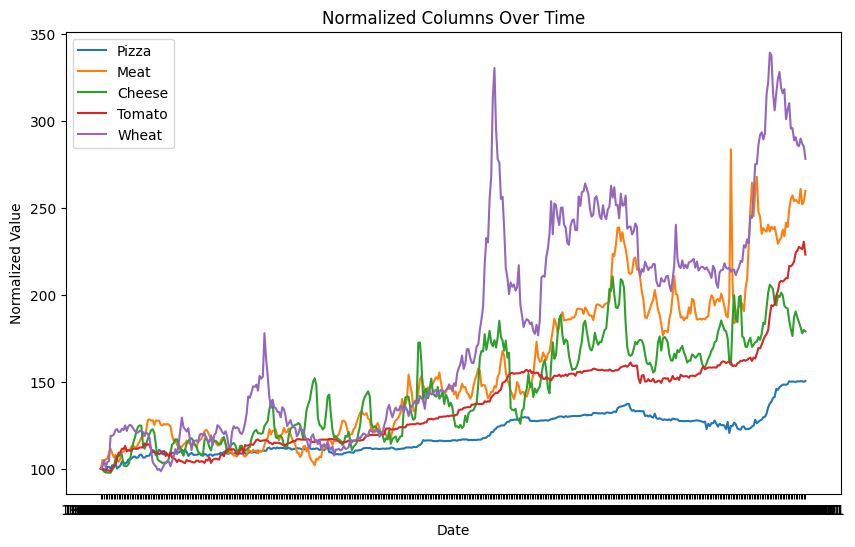

In [ ]:
plt.figure(figsize=(10, 6))
for column in df.columns[1:]:
    plt.plot(df['Date'], df[column], label=column)

plt.title('Normalized Columns Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.show()

In [ ]:
correlation_with_pizza = df.drop(columns=['Date']).corrwith(df['Pizza'])

print("Correlation of each column (excluding 'Date') with 'Pizza' column:")
print(correlation_with_pizza)

Correlation of each column (excluding 'Date') with 'Pizza' column:
Pizza     1.000000
Meat      0.903847
Cheese    0.870491
Tomato    0.961514
Wheat     0.914446
dtype: float64


In [ ]:
import pandas as pd


# Set Date as index if it's not already
df.set_index('Date', inplace=True)

# Summary statistics
summary_stats = df.describe()
print(summary_stats)

# Correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

# Variance
variance = df.var()
print(variance)

# Covariance matrix
covariance_matrix = df.cov()
print(covariance_matrix)

# Plotting (as shown in the visualizations section above)


            Pizza        Meat      Cheese      Tomato       Wheat
count  436.000000  436.000000  436.000000  436.000000  436.000000
mean   119.574801  156.341888  144.960625  137.095431  178.452617
std     11.490839   43.709774   29.041810   27.250461   62.373565
min     97.899838  100.000000   97.669492   98.500000   98.555556
25%    109.995961  117.716115  118.061441  114.975000  121.555556
50%    116.316640  144.450374  141.313559  130.500000  154.166667
75%    128.190630  190.021345  170.948093  155.200000  220.916667
max    150.449919  283.671291  210.487288  230.496000  339.151111
           Pizza      Meat    Cheese    Tomato     Wheat
Pizza   1.000000  0.903847  0.870491  0.961514  0.914446
Meat    0.903847  1.000000  0.878205  0.914312  0.893058
Cheese  0.870491  0.878205  1.000000  0.854701  0.898948
Tomato  0.961514  0.914312  0.854701  1.000000  0.910347
Wheat   0.914446  0.893058  0.898948  0.910347  1.000000
Pizza      132.039387
Meat      1910.544346
Cheese     843.42670

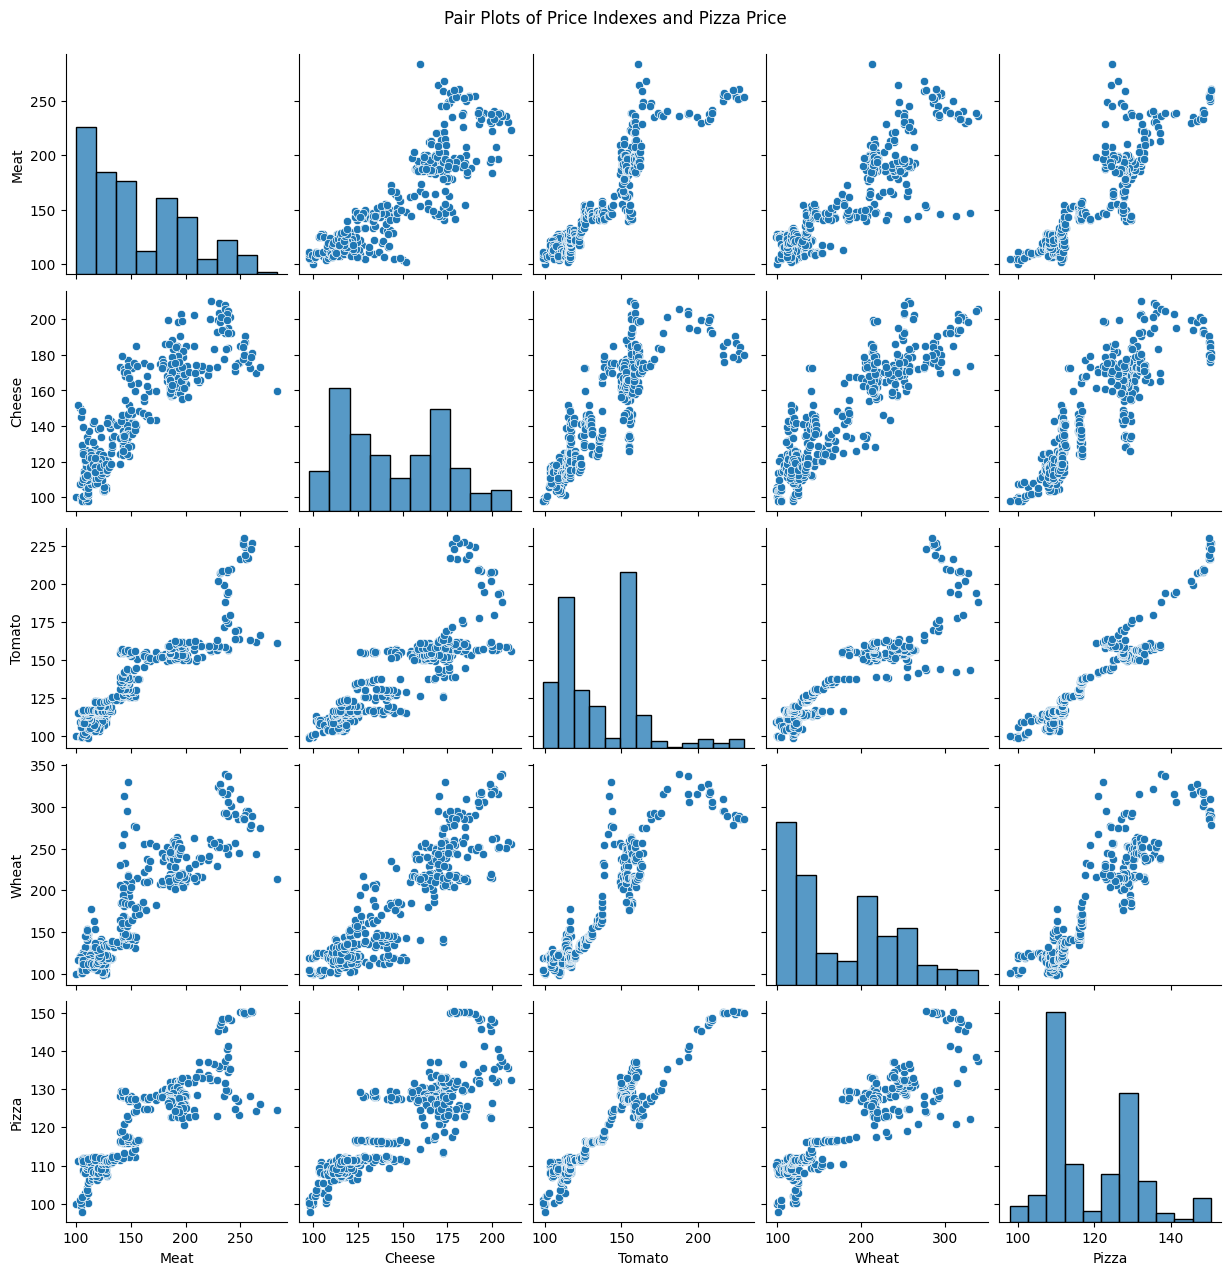

In [ ]:
import seaborn as sns
sns.pairplot(df[['Meat', 'Cheese', 'Tomato', 'Wheat', 'Pizza']])
plt.suptitle('Pair Plots of Price Indexes and Pizza Price', y=1.02)
plt.show()


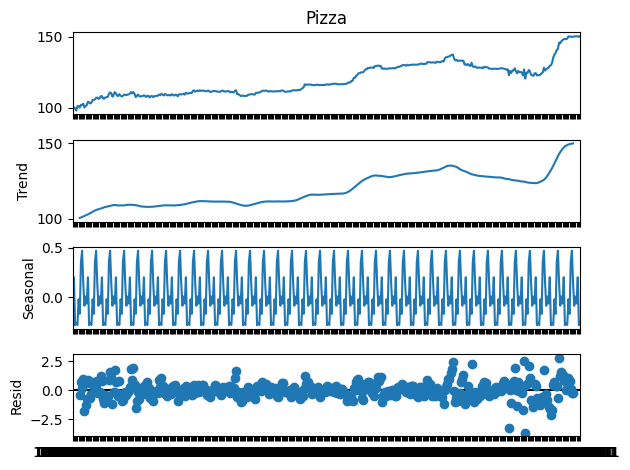

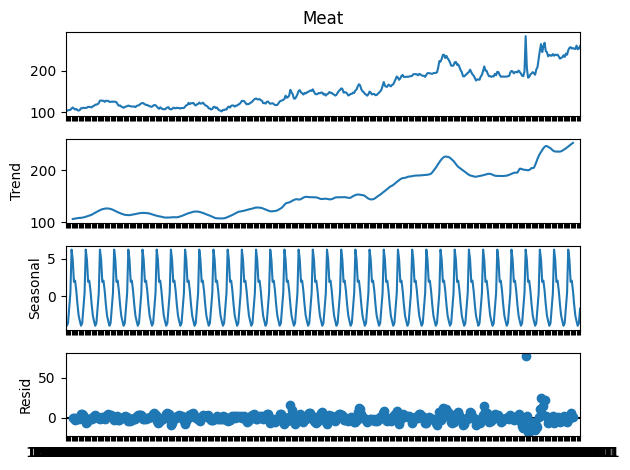

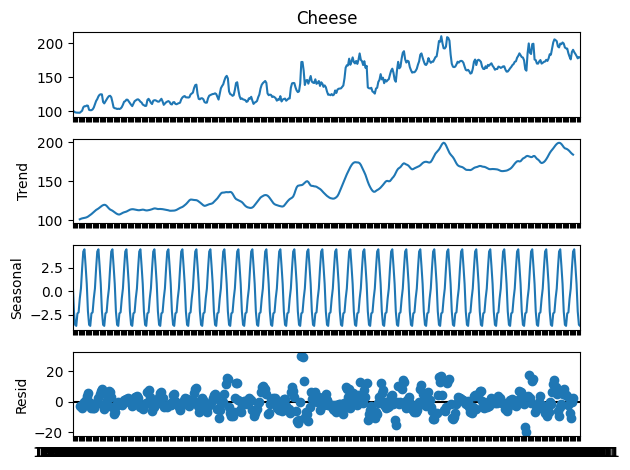

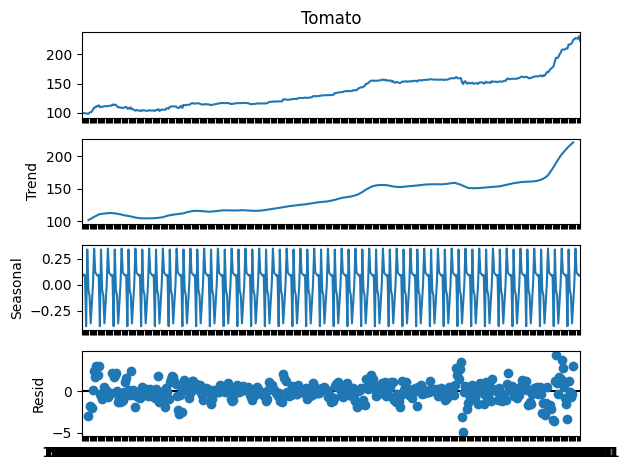

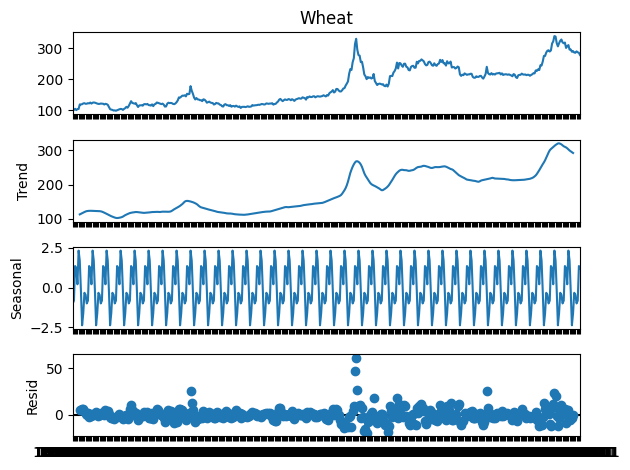

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

for column in df.columns:
    result = seasonal_decompose(df[column], model='additive', period=12)
    result.plot()
    plt.show()


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['Meat', 'Cheese', 'Tomato', 'Wheat']]
X['Intercept'] = 1  # adding intercept for VIF calculation
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)


     feature        VIF
0       Meat   7.890137
1     Cheese   6.105007
2     Tomato   8.295421
3      Wheat   8.716074
4  Intercept  70.855517


Don't run the next bit if you don't have the GDP.csv dataset

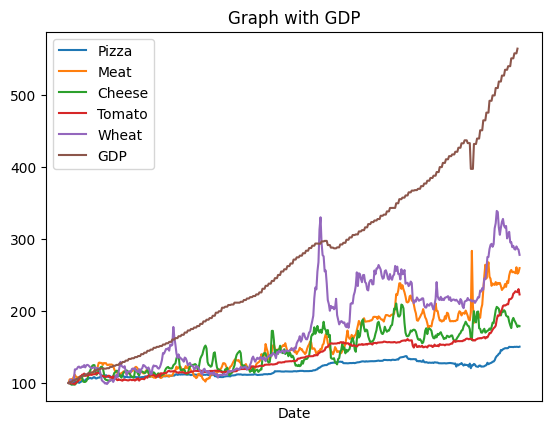

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load your data into a pandas DataFrame (replace 'GDP.csv' with your file path)
gdp_df = pd.read_csv('GDP.csv')
gdp_df = gdp_df.iloc[163:]

# Convert the 'DATE' column to datetime
gdp_df['Date'] = pd.to_datetime(gdp_df['DATE'])

# Drop the 'DATE' column
gdp_df.drop(columns=['DATE'], inplace=True)

# Set the 'Date' column as the index
gdp_df.set_index('Date', inplace=True)

# Resample to start of the month and forward fill missing values
gdp_df = gdp_df.resample('MS').ffill()

# Reset index to include 'Date' as a regular column
gdp_df.reset_index(inplace=True)

# Calculate the index values based on the GDP billions of dollars
gdp_df['Index'] = (gdp_df['GDP'] / gdp_df['GDP'].iloc[0]) * 100
gdp_df = gdp_df.iloc[2:]

# Plot the data
for column in df.columns[1:]:
    plt.plot(df['Date'], df[column], label=column)

# Convert 'Date' to string for plotting
gdp_df['Date'] = gdp_df['Date'].dt.strftime('%Y-%m-%d')

plt.plot(gdp_df['Date'], gdp_df['Index'], label='GDP')

# Set the x-axis ticks to every 4 years
plt.gca().xaxis.set_major_locator(mdates.YearLocator(4))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.title('Graph with GDP')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend()
plt.show()
#thought it'd be interesting to plot

In [ ]:
!pip install sktime
from sktime.utils.plotting import plot_series

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.1/130.1 kB 20.9 MB/s eta 0:00:00


In [ ]:
from sktime.split import temporal_train_test_split
from sklearn.metrics import mean_squared_error

# Define features (X) and target variable (y)
features = ['Tomato', 'Wheat', 'Cheese', 'Meat']
X = df[features]
y = df['Pizza']
test_size = 24
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = temporal_train_test_split(X, y, test_size = test_size)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calculate_regression_metrics(model_name, y_true, y_pred, linearity):
    """
    Calculate multiple regression performance metrics and store them in a DataFrame.

    Parameters:
        model_name (str): Name of the model.
        y_true (array-like): Array of true target values.
        y_pred (array-like): Array of predicted target values.

    Returns:
        metrics_df (pd.DataFrame): DataFrame containing regression performance metrics.
    """
    metrics = {}

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_true, y_pred)
    metrics['MAE'] = mae

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_true, y_pred)
    metrics['MSE'] = mse

    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)
    metrics['RMSE'] = rmse

    # Calculate Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    metrics['MAPE'] = mape

    # Calculate R-squared (R²)
    r2 = r2_score(y_true, y_pred)
    metrics['R²'] = r2

    # Create DataFrame from metrics
    metrics_df = pd.DataFrame(metrics, index=[model_name])
    metrics_df['Predicted'] = [y_pred]
    metrics_df['Linear'] = [linearity]
    return metrics_df

# Example usage:
# metrics_df = calculate_regression_metrics('Linear Regression', y_test, y_pred, (1 for linear 0 for non linear))
all_metrics_df = pd.DataFrame()

**LinearModels below**

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Pizza'>)

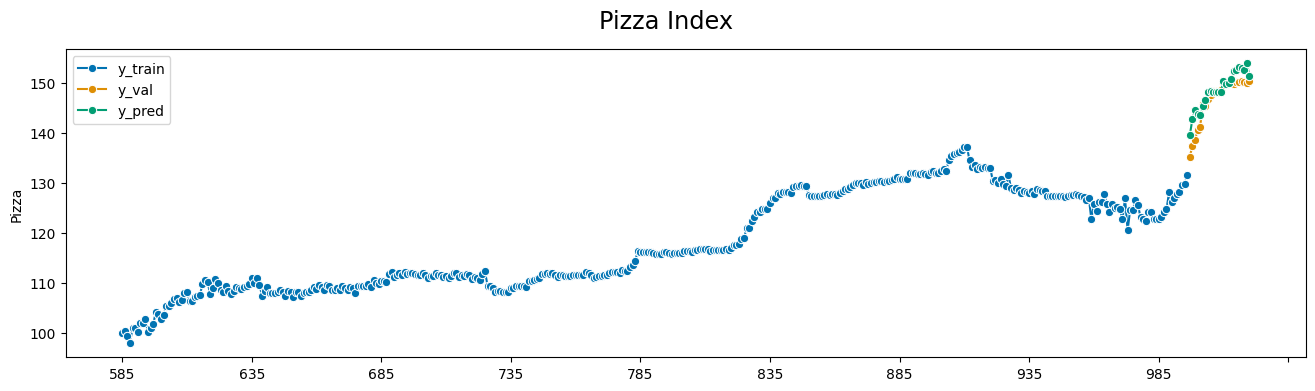

In [ ]:
#linear regression
from sklearn.linear_model import LinearRegression
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
LR_metrics = calculate_regression_metrics('Linear Regression', y_test, y_pred, 1)

all_metrics_df = pd.concat([all_metrics_df, LR_metrics])

y_train = pd.Series(y_train)
y_test = pd.Series(y_test)
y_pred = pd.Series(y_pred, index=df.index[-test_size:])

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_val", "y_pred"], title='Pizza Index')

In [ ]:
#print(all_metrics_df)

                             MAE       MSE      RMSE      MAPE        R²  \
Ridge Regression        1.882987  6.511133  2.551692  1.308351  0.684795   
Lasso Regression        1.758475  5.649975  2.376968  1.224564  0.726483   
Ridge Regression        1.882987  6.511133  2.551692  1.308351  0.684795   
Lasso Regression        1.758475  5.649975  2.376968  1.224564  0.726483   
Elastic Net Regression  1.785237  5.821574  2.412794  1.242649  0.718176   

                                                                Predicted  \
Ridge Regression        [139.5416212692924, 142.797205264274, 144.5968...   
Lasso Regression        [139.55645545756727, 142.75370041225838, 144.4...   
Ridge Regression        [139.5416212692924, 142.797205264274, 144.5968...   
Lasso Regression        [139.55645545756727, 142.75370041225838, 144.4...   
Elastic Net Regression  [139.56087367015004, 142.7682495715189, 144.52...   

                        Linear  
Ridge Regression             1  
Lasso Regressi

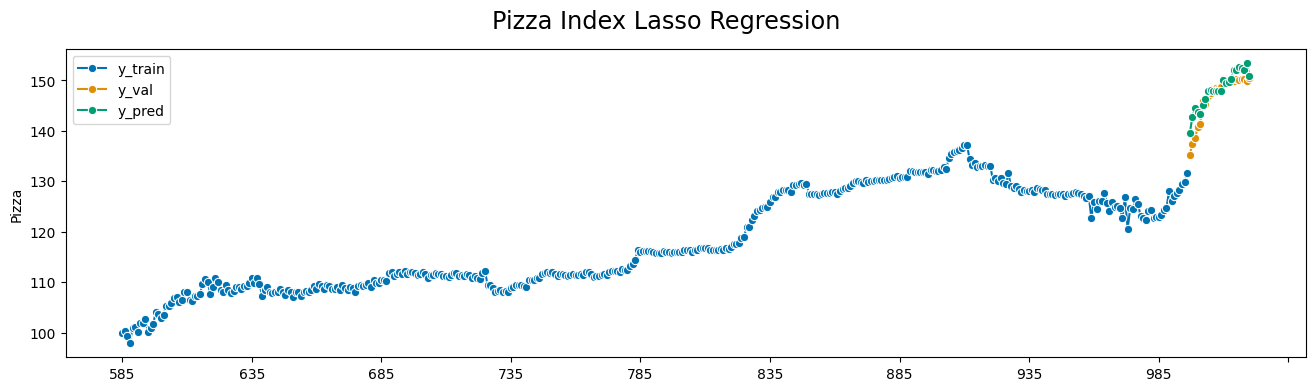

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet


# Ridge Regression
model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
Ridge_metrics = calculate_regression_metrics('Ridge Regression', y_test, y_pred, 1)
all_metrics_df = pd.concat([all_metrics_df, Ridge_metrics])

# Lasso Regression
model = Lasso()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
Lasso_metrics = calculate_regression_metrics('Lasso Regression', y_test, y_pred, 1)
all_metrics_df = pd.concat([all_metrics_df, Lasso_metrics])

y_train = pd.Series(y_train)
y_test = pd.Series(y_test)
y_pred = pd.Series(y_pred, index=df.index[-test_size:])
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_val", "y_pred"], title='Pizza Index Lasso Regression')
# Elastic Net Regression
model = ElasticNet()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
ElasticNet_metrics = calculate_regression_metrics('Elastic Net Regression', y_test, y_pred, 1)
all_metrics_df = pd.concat([all_metrics_df, ElasticNet_metrics])

print(all_metrics_df)

**Non Linear Models Below**

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Pizza'>)

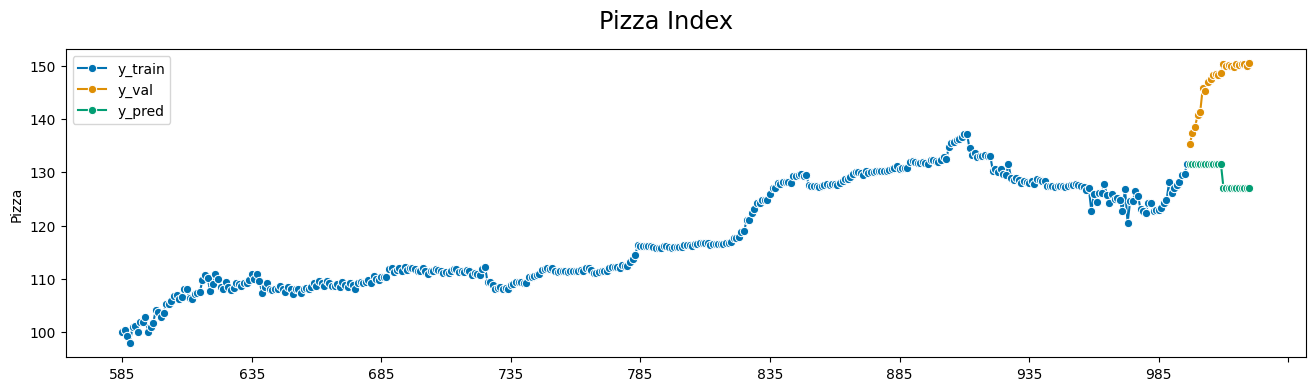

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
DT_metrics = calculate_regression_metrics('Decision Tree', y_test, y_pred, 0)
all_metrics_df = pd.concat([all_metrics_df, DT_metrics])

y_train = pd.Series(y_train)
y_test = pd.Series(y_test)
y_pred = pd.Series(y_pred, index=df.index[-test_size:])

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_val", "y_pred"], title='Pizza Index')

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Pizza'>)

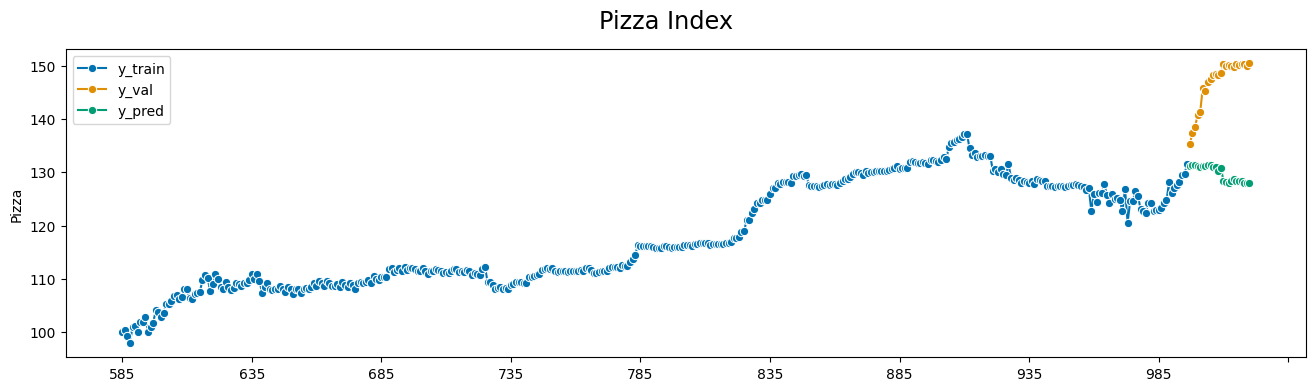

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
RF_metrics = calculate_regression_metrics('Random Forest', y_test, y_pred, 0)
all_metrics_df = pd.concat([all_metrics_df, RF_metrics])

y_train = pd.Series(y_train)
y_test = pd.Series(y_test)
y_pred = pd.Series(y_pred, index=df.index[-test_size:])

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_val", "y_pred"], title='Pizza Index')

In [ ]:
#!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.4 MB/s eta 0:00:00


In [ ]:
from sktime.forecasting.arima import AutoARIMA
# Simplex Regression
model = AutoARIMA(sp=0, suppress_warnings=True)
model.fit(X_train, y_train)
y_pred = model.predict(48) #doesnot seem to work with X_test
Simplex_metrics = calculate_regression_metrics('Simplex Regression', y_test, y_pred, 0)
all_metrics_df = pd.concat([all_metrics_df, Simplex_metrics])

KeyboardInterrupt: 

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Pizza'>)

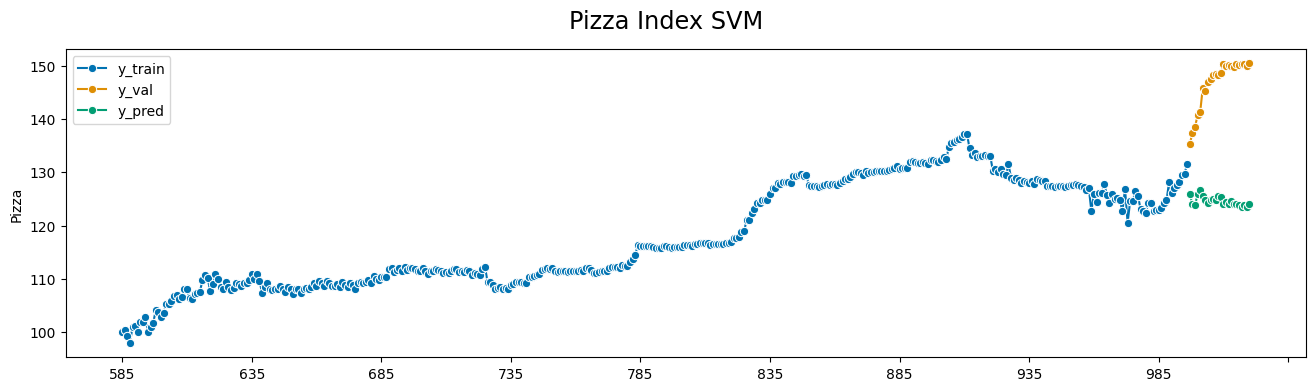

In [ ]:
from sklearn.svm import SVR



# Support Vector Machines (SVM)
model = SVR()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
SVM_metrics = calculate_regression_metrics('Support Vector Machines (SVM)', y_test, y_pred, 0)
all_metrics_df = pd.concat([all_metrics_df, SVM_metrics])

y_train = pd.Series(y_train)
y_test = pd.Series(y_test)
y_pred = pd.Series(y_pred, index=df.index[-test_size:])

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_val", "y_pred"], title='Pizza Index SVM')

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Define the parameter grid for the number of neighbors
param_grid = {'n_neighbors': range(1, 101)}

# Initialize the KNeighborsRegressor
knn = KNeighborsRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')  # Use appropriate scoring metric

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best number of neighbors
best_k = grid_search.best_params_['n_neighbors']
print(f"Best number of neighbors: {best_k}")

# Train the model with the best number of neighbors
best_knn = KNeighborsRegressor(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Predict on the test set
y_pred = best_knn.predict(X_test)

# Calculate and store the metrics
KNN_metrics = calculate_regression_metrics('K-Nearest Neighbors (KNN)', y_test, y_pred, 0)
all_metrics_df = pd.concat([all_metrics_df, KNN_metrics])

# Print the dataframe to check the results
print(all_metrics_df)



Best number of neighbors: 73
                                 MAE         MSE       RMSE       MAPE  \
K-Nearest Neighbors (KNN)  15.706000  266.361134  16.320574  10.610069   
K-Nearest Neighbors (KNN)  16.770383  301.580489  17.366073  11.334110   

                                  R²  \
K-Nearest Neighbors (KNN) -11.894602   
K-Nearest Neighbors (KNN) -13.599579   

                                                                   Predicted  \
K-Nearest Neighbors (KNN)  [130.89781906300487, 130.8331987075929, 130.89...   
K-Nearest Neighbors (KNN)  [129.94827052028236, 129.94827052028236, 129.9...   

                           Linear  
K-Nearest Neighbors (KNN)       0  
K-Nearest Neighbors (KNN)       0  


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best parameters found: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'max_iter': 200, 'solver': 'sgd'}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


           MAE         MSE     RMSE       MAPE         R²  \
MLP  15.958673  274.329646  16.5629  10.782373 -12.280359   

                                             Predicted  Linear  
MLP  [130.58162338313528, 130.6722942726724, 130.74...       0  


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Pizza'>)

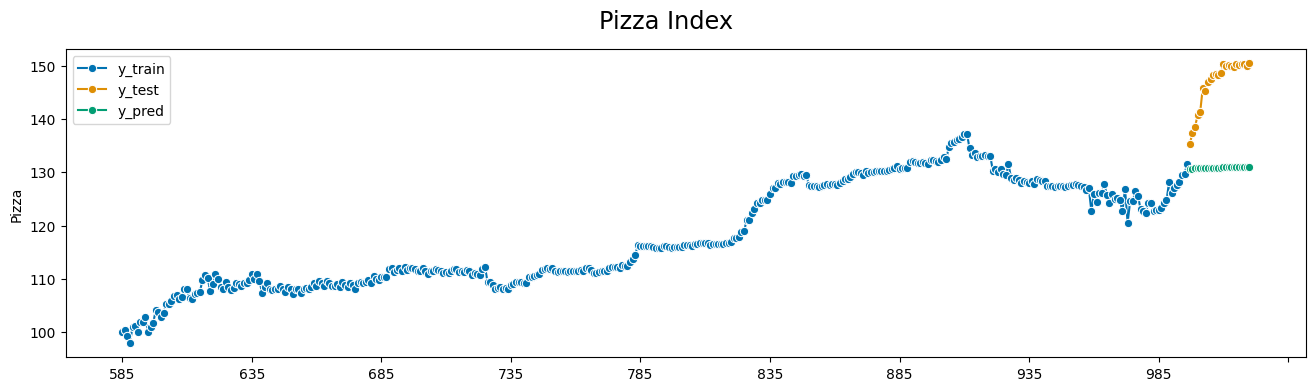

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
# MLP (Multi-layer Perceptron)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(50,50), (100,)],
    'activation': ['tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 500]
}

# Initialize the MLPRegressor
mlp = MLPRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_s, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

# Train the model with the best parameters
best_mlp = MLPRegressor(**best_params)
best_mlp.fit(X_train_s, y_train)

# Predict on the test set
y_pred = best_mlp.predict(X_test_s)

# Calculate and store metrics
MLP_metrics = calculate_regression_metrics('MLP', y_test, y_pred, 0)
all_metrics_df = pd.concat([all_metrics_df, MLP_metrics])

# Print the metrics
print(MLP_metrics)

y_train = pd.Series(y_train)
y_test = pd.Series(y_test)
y_pred = pd.Series(y_pred, index=df.index[-test_size:])

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"], title='Pizza Index')

In [ ]:
print(all_metrics_df)

                                     MAE         MSE       RMSE       MAPE  \
Linear Regression               1.883191    6.512524   2.551965   1.308487   
Ridge Regression                1.882987    6.511133   2.551692   1.308351   
Lasso Regression                1.758475    5.649975   2.376968   1.224564   
Elastic Net Regression          1.785237    5.821574   2.412794   1.242649   
Decision Tree                  17.336564  340.362327  18.448911  11.686272   
Random Forest                  17.063472  323.277085  17.979908  11.510909   
Support Vector Machines (SVM)  22.236315  519.204779  22.786065  15.051712   
K-Nearest Neighbors (KNN)      17.808232  340.272104  18.446466  12.035481   
MLP                            18.930474  385.103567  19.624056  12.838359   

                                      R²  \
Linear Regression               0.684727   
Ridge Regression                0.684795   
Lasso Regression                0.726483   
Elastic Net Regression          0.718176   

# Code for EDM with detrending preprocessing

## Code preparation All in python but keeping it as text here
fdata["Date"]=fdata["Date"].apply(lambda x: x[:7])

for i in ["Pizza","Meat","Cheese","Tomato","Wheat"]:
    fdata[i] = fdata[i].apply(lambda x: float(x))

print(fdata)

print(fdata["Date"].iloc[0])
print(max(fdata["Meat"]))

## Plotting
plt.figure()
plt.plot(fdata["Date"],fdata["Pizza"], label="Pizza")
plt.plot(fdata["Date"],fdata["Meat"],label="Meat")
plt.plot(fdata["Date"],fdata["Cheese"],label="Cheese")
plt.plot(fdata["Date"],fdata["Tomato"],label="Tomato")
plt.plot(fdata["Date"],fdata["Wheat"],label="Wheat")
plt.xticks(rotation=50, ha='right')
plt.xticks(np.arange(0, len(fdata["Date"])+1, 20))
plt.yticks(np.arange(0,float(max(fdata["Meat"])),10))
plt.legend()

## Normalization
normD= fdata.copy(deep=True)
for i in ["Pizza","Meat","Cheese","Tomato","Wheat"]:
    normD[i] = (normD[i] - np.min(normD[i])) / (np.max(normD[i]) - np.min(normD[i]))
    
print(normD)

plt.figure()
plt.plot(normD["Date"],normD["Pizza"], label="Pizza")
plt.plot(normD["Date"],normD["Meat"], label="Meat")
plt.plot(normD["Date"],normD["Cheese"],label="Cheese")
plt.plot(normD["Date"],normD["Tomato"],label="Tomato")
plt.plot(normD["Date"],normD["Wheat"],label="Wheat")
plt.xticks(rotation=50, ha='right')
plt.xticks(np.arange(0, len(normD["Date"])+1, 20))
plt.yticks(np.arange(0,1.1,0.2))
plt.legend()

## Stationarity test
from sktime.param_est.stationarity import StationarityADF


for i in ["Pizza","Meat","Cheese","Tomato","Wheat"]:
    print(i)
    sty_est = StationarityADF()
    sty_est.fit(normD[i])


    print('Stationary:', sty_est.get_fitted_params()["stationary"])
    print('ADF Statistic:', sty_est.get_fitted_params()["test_statistic"])
    print('p-value:', sty_est.get_fitted_params()["pvalue"])
    print()
    
for i in ["Pizza","Meat","Cheese","Tomato","Wheat"]:
    normD[i]=normD[i].diff()
    
normD = normD.iloc[1:]
print(normD)
for i in ["Pizza","Meat","Cheese","Tomato","Wheat"]:
    sty_est = StationarityADF()
    sty_est.fit(normD[i])


    print('Stationary:', sty_est.get_fitted_params()["stationary"])
    print('ADF Statistic:', sty_est.get_fitted_params()["test_statistic"])
    print('p-value:', sty_est.get_fitted_params()["pvalue"])
    print()
    

## plotting result
plt.figure()
plt.plot(normD["Date"],normD["Pizza"], label="Pizza")
plt.plot(normD["Date"],normD["Meat"], label="Meat")
plt.plot(normD["Date"],normD["Cheese"],label="Cheese")
plt.plot(normD["Date"],normD["Tomato"],label="Tomato")
plt.plot(normD["Date"],normD["Wheat"],label="Wheat")
plt.xticks(rotation=50, ha='right')
plt.xticks(np.arange(0, len(normD["Date"])+1, 20))
plt.yticks(np.arange(-0.5,0.6,0.1))
plt.legend()


# EDM in R
## Check for embed dim
lib_point <- c(1,floor(max(length(norm$Pizza))/2))
pred_point <- c(floor(max(length(norm$Pizza))/2)+1,max(length(norm$Pizza)))

rho_emd_ML <- EmbedDimension(dataFrame = norm, lib = lib_point, pred = pred_point, columns='Pizza', target ='Pizza')

## Parameters for S-Map
tau.ami <- timeLag(norm$Pizza, technique = "ami", lag.max = 100, do.plot = T)

emb.dim = estimateEmbeddingDim(norm$Pizza, time.lag = tau.ami, max.embedding.dim = 15)

## Univariate S-Map forecasting on pizza alone
smap_ML_uni <- SMap(dataFrame = norm, lib = lib_point, pred = pred_point, E=emb.dim, tau = tau.ami,columns="Pizza", target ='Pizza', embedded = FALSE, theta=0)
univariate_stats <- ComputeError(smap_ML_uni$predictions$Observations,smap_ML_uni$predictions$Predictions)
univariate_stats

## Mulitvariate S-Map
smap_ML_multi <- SMap(dataFrame = norm, lib = lib_point, pred = pred_point, E=emb.dim, tau = tau.ami, columns= c("Pizza","Meat","Cheese","Tomato","Wheat"), target ='Pizza', embedded = TRUE, theta=0)
multivariate_stats <- ComputeError(smap_ML_multi$predictions$Observations,smap_ML_multi$predictions$Predictions)

print(multivariate_stats)

smap_ML_multi <- SMap(dataFrame = norm, lib = lib_point, pred = pred_point, E=emb.dim, tau = tau.ami, columns= c("Meat","Cheese","Tomato","Wheat"), target ='Pizza', embedded = TRUE, theta=0)
multivariate_stats <- ComputeError(smap_ML_multi$predictions$Observations,smap_ML_multi$predictions$Predictions)

print(multivariate_stats)

## Multiview as a small bonus
ML_mv_out <- Multiview(dataFrame = norm, lib= lib_point, pred = pred_point, E=2, target= "Pizza", columns =c("Pizza","Meat","Cheese","Tomato","Wheat"))
multiview_stats <- ComputeError(ML_mv_out$Predictions$Observations,ML_mv_out$Predictions$Predictions)
multiview_stats

## Let's create a box plot to compare the rhos
rhos <- c(univariate_stats$rho, multivariate_stats$rho, multiview_stats$rho)
rhos <- as.numeric(rhos)
names(rhos) <- c("Univariate", "Multivariate", "Multiview")
barplot(rhos, xlab="Methods", xpd = F, ylab=expression(paste("Prediction skill (", rho, ")")), ylim=c(0.98, 1)); box()



# Entropy analyses
fractaldata <- norm

## Sample Entropy for each individual signal
s1.SampEn <- sample_entropy(fractaldata$Pizza, edim=2,r=0.2*sd(fractaldata$Pizza),tau=1)
s2.SampEn <- sample_entropy(fractaldata$Meat, edim=2,r=0.2*sd(fractaldata$Meat),tau=1)
s3.SampEn <- sample_entropy(fractaldata$Cheese, edim=2,r=0.2*sd(fractaldata$Cheese),tau=1)
s4.SampEn <- sample_entropy(fractaldata$Tomato, edim=2,r=0.2*sd(fractaldata$Tomato),tau=1)
s5.SampEn <- sample_entropy(fractaldata$Wheat, edim=2,r=0.2*sd(fractaldata$Wheat),tau=1)

## Calculate transfer entropy for information across modalities
walk_te_Meat <- transfer_entropy(fractaldata$Pizza,fractaldata$Meat, nboot = 100, lx=1 ,ly=1)
summary(walk_te_Meat)
walk_te_Cheese <- transfer_entropy(fractaldata$Pizza,fractaldata$Cheese, nboot = 100, lx=1 ,ly=1)
summary(walk_te_Cheese)
walk_te_Tomato <- transfer_entropy(fractaldata$Pizza,fractaldata$Tomato, nboot = 100, lx=1 ,ly=1)
summary(walk_te_Tomato)
walk_te_Wheat <- transfer_entropy(fractaldata$Pizza,fractaldata$Wheat, nboot = 100, lx=1 ,ly=1)
summary(walk_te_Wheat)
```